In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.pylab import rcParams
import itertools



In [2]:
df = pd.read_csv('android-games.csv')


In [3]:
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False


In [4]:
df.tail()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
1725,96,Piknik Słowo - Word Snack,122845,1.0 M,4.67,0.1,0.3,0.0,GAME WORD,96954,17233,5098,1249,2309,False
1726,97,Wordox – Free multiplayer word game,120476,1.0 M,4.21,0.0,0.1,0.0,GAME WORD,74010,21546,10648,4710,9560,False
1727,98,4 Fotos 1 Palavra,114852,5.0 M,4.52,0.3,0.6,0.0,GAME WORD,84688,16783,6619,1867,4892,False
1728,99,زوايا - لعبة ستحرك زوايا عقلك,110293,1.0 M,4.76,0.8,1.9,0.0,GAME WORD,99168,3528,3258,1059,3278,False
1729,100,Word Life - Connect crosswords puzzle,109809,5.0 M,4.38,6.9,14.2,0.0,GAME WORD,70647,22630,8794,2775,4961,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


In [6]:
df.category.value_counts()


GAME CARD            122
GAME WORD            106
GAME CASUAL          102
GAME SIMULATION      100
GAME ACTION          100
GAME RACING          100
GAME PUZZLE          100
GAME STRATEGY        100
GAME MUSIC           100
GAME EDUCATIONAL     100
GAME ROLE PLAYING    100
GAME BOARD           100
GAME CASINO          100
GAME TRIVIA          100
GAME ARCADE          100
GAME ADVENTURE       100
GAME SPORTS          100
Name: category, dtype: int64

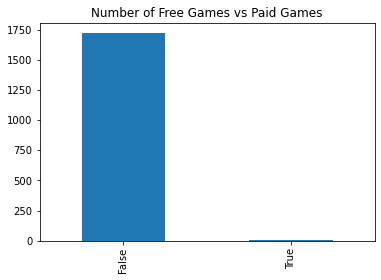

In [7]:
df['paid'].value_counts().plot(kind='bar', title='Number of Free Games vs Paid Games');


In [8]:
df.value_counts('category')

category
GAME CARD            122
GAME WORD            106
GAME CASUAL          102
GAME EDUCATIONAL     100
GAME ADVENTURE       100
GAME ARCADE          100
GAME BOARD           100
GAME CASINO          100
GAME MUSIC           100
GAME TRIVIA          100
GAME PUZZLE          100
GAME RACING          100
GAME ROLE PLAYING    100
GAME SIMULATION      100
GAME SPORTS          100
GAME STRATEGY        100
GAME ACTION          100
dtype: int64

In [9]:
df.isnull().sum()


rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

In [10]:
df.installs.value_counts()


10.0 M      795
50.0 M      266
5.0 M       248
100.0 M     203
1.0 M       191
500.0 k      13
500.0 M      10
100.0 k       2
1000.0 M      2
Name: installs, dtype: int64

In [12]:
import seaborn as sns
